# The Spark Foundations Intern Task 4  - Decision Tree

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [51]:
import numpy as np 
import pandas as pd
import sklearn.datasets as al
from sklearn.tree import DecisionTreeClassifier

## Get the Data Set : 

https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing


## About the Data

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:
<ul>
    <li> <i><b>Id</b></i> </li>
    <li> <i><b>SepalLengthCm</b></i> </li>
    <li> <i><b>SepalWidthCm</b></i> </li>
    <li> <i><b>PetalLengthCm</b></i> </li>
    <li> <i><b>PetalWidthCm</b></i> </li>
    <li> <i><b>Species</b> </i></li>
    <li> <i><b>Sepal Width vs. Sepal Length</b></i> </li>
</ul>

### Loading the Data Set

##### As I'm Using IBM Cloud, here we need to uplode the data-set into the cloud and therefore we use API's and Connect towards the cloud storange and make import it into the Cloud-Notebook.

In [52]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8f5cd40fd4e840b5b3aa190dfe434798 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='RHwTMbXkoQRs2YssUDzT51IeMaeOQgKFecNr2Omix9U6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_8f5cd40fd4e840b5b3aa190dfe434798.get_object(Bucket='sparkfoundationsinterntasks-donotdelete-pr-pguzanme2fq4ih',Key='Iris.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

my_data = pd.read_csv(body)
my_data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



## Pre-processing

Using <b>my_data</b> as the Iris.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>

In [53]:
X = my_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
X[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

Now we can fill the target variable.

In [54]:
y = my_data["Species"]
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    
We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

In [55]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b>will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [56]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=0)

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    
    
    
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>IrisTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [57]:
IrisTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
IrisTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [58]:
IrisTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    
    
  Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [59]:
predTree = IrisTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [60]:
print (predTree [0:4])
print (y_testset [0:4])

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica']
114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
Name: Species, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    
Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [61]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


# Visualization
#### _Updating conda and install the packages..!_

In [62]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

ModuleNotFoundError: No module named 'pydotplus'

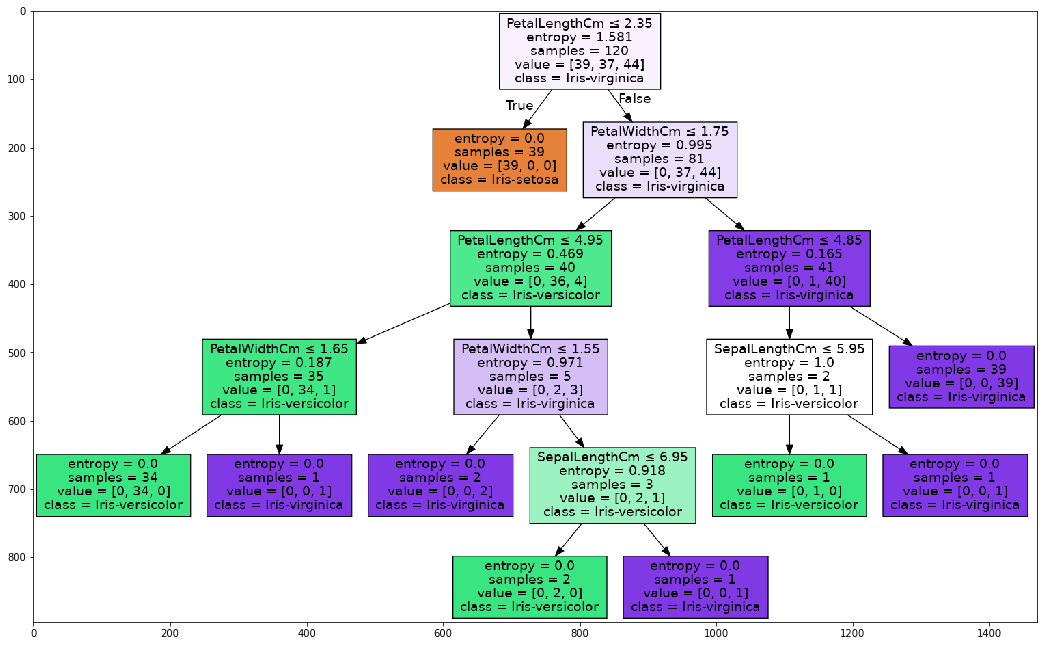

In [117]:
dot_data = StringIO()
filename = "IrisTree.png"
featureNames = my_data.columns[1:5]
targetNames = my_data["Species"].unique().tolist()
out=tree.export_graphviz(IrisTree,feature_names=featureNames,out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(18,18))
plt.imshow(img,interpolation='nearest')

## Thanks You
 
   #### _-Srinivas Sudheer Reddy B_